<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/CIA_Component2_2348505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary Libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns

In [90]:
#Importing the dataset

data = pd.read_csv("/content/2015.csv")

In [91]:
#printing the first five rows of the data
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [92]:
#Number of rows and columns
data.shape

(158, 12)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [94]:
#Creating bins for happiness score
bins = [2,4,6,8]
labels = ['LowHappiness','MediumHappiness','HighHappiness']
data['Happiness Score'] = pd.cut(data['Happiness Score'],bins,labels=labels)

In [95]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,HighHappiness,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,HighHappiness,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,HighHappiness,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,HighHappiness,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,HighHappiness,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [102]:
#Performing Label Encoding
le = LabelEncoder()
data["RegionEnc"] = pd.DataFrame(le.fit_transform(data["Region"]))

In [100]:
#Performing One-Hot encoding
encoded = OneHotEncoder() #Calling the function
enc_data = pd.DataFrame(encoded.fit_transform(data[["Region"]]).toarray()) #Transforming the data and fitting it into a dataframe

<Axes: >

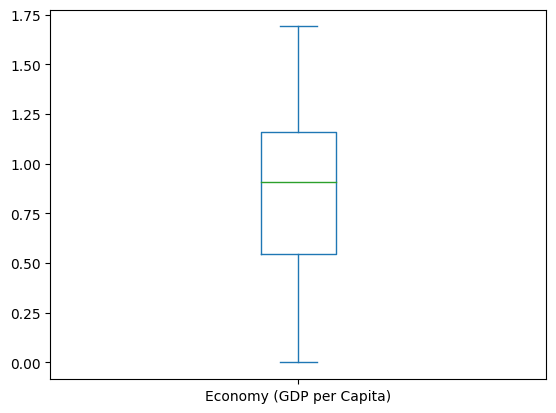

In [ ]:
#Boxplot
data["Economy (GDP per Capita)"].plot(kind="box")

In [ ]:
#Since there are no outliers, we are performing min-max normalization
data["Economy (GDP per Capita)"]= data["Economy (GDP per Capita)"]  / data["Economy (GDP per Capita)"].abs().max()

In [ ]:
data["Region"]

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int64

In [103]:
#Performing chi-square test
X = data[["RegionEnc"]]
Y = data[["Happiness Rank"]]
chi_scores = chi2(X,Y)

In [104]:
chi_scores

(array([273.8566131]), array([1.70258781e-08]))

In [106]:
p_value = chi_scores[1]
if p_value < 0.05:
  print("We fail to reject null hypothesis. There is no significant relationship between Region and Happiness Score")
else:
  print("We reject null hypothesis. There is a significant relationship between Region and Happiness Score")

We fail to reject null hypothesis. There is no significant relationship between Region and Happiness Score


<Axes: >

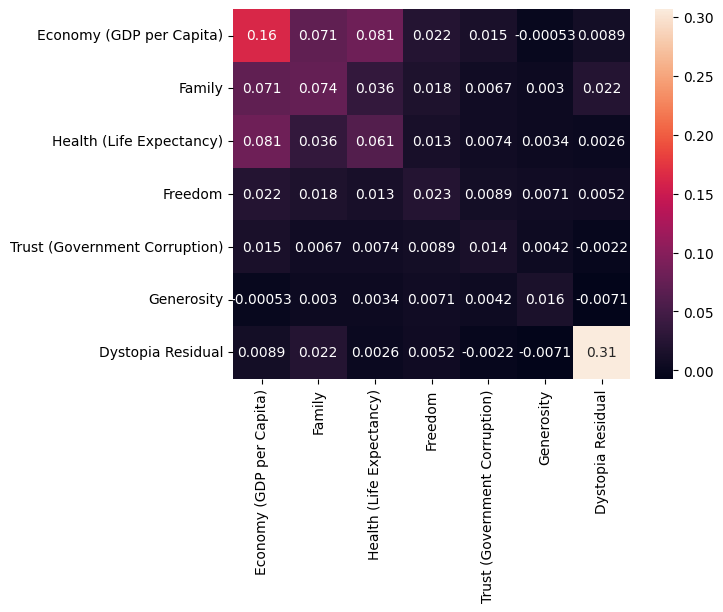

In [ ]:
#Covariance matrix for the numerical variables
data_num = data[["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
cov_mat = pd.DataFrame.cov(data_num)
sns.heatmap(cov_mat,annot=True)

In [ ]:
data["Health (Life Expectancy)"]= data["Health (Life Expectancy)"]  / data["Health (Life Expectancy)"].abs().max()

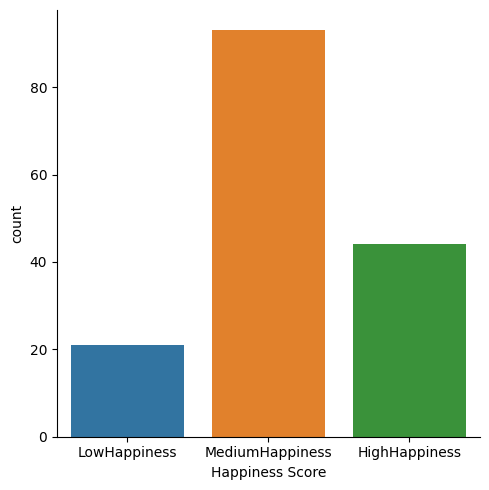

In [ ]:
#Countplot
sns.catplot(kind= "count", x="Happiness Score",data=data)

<Axes: xlabel='Region', ylabel='count'>

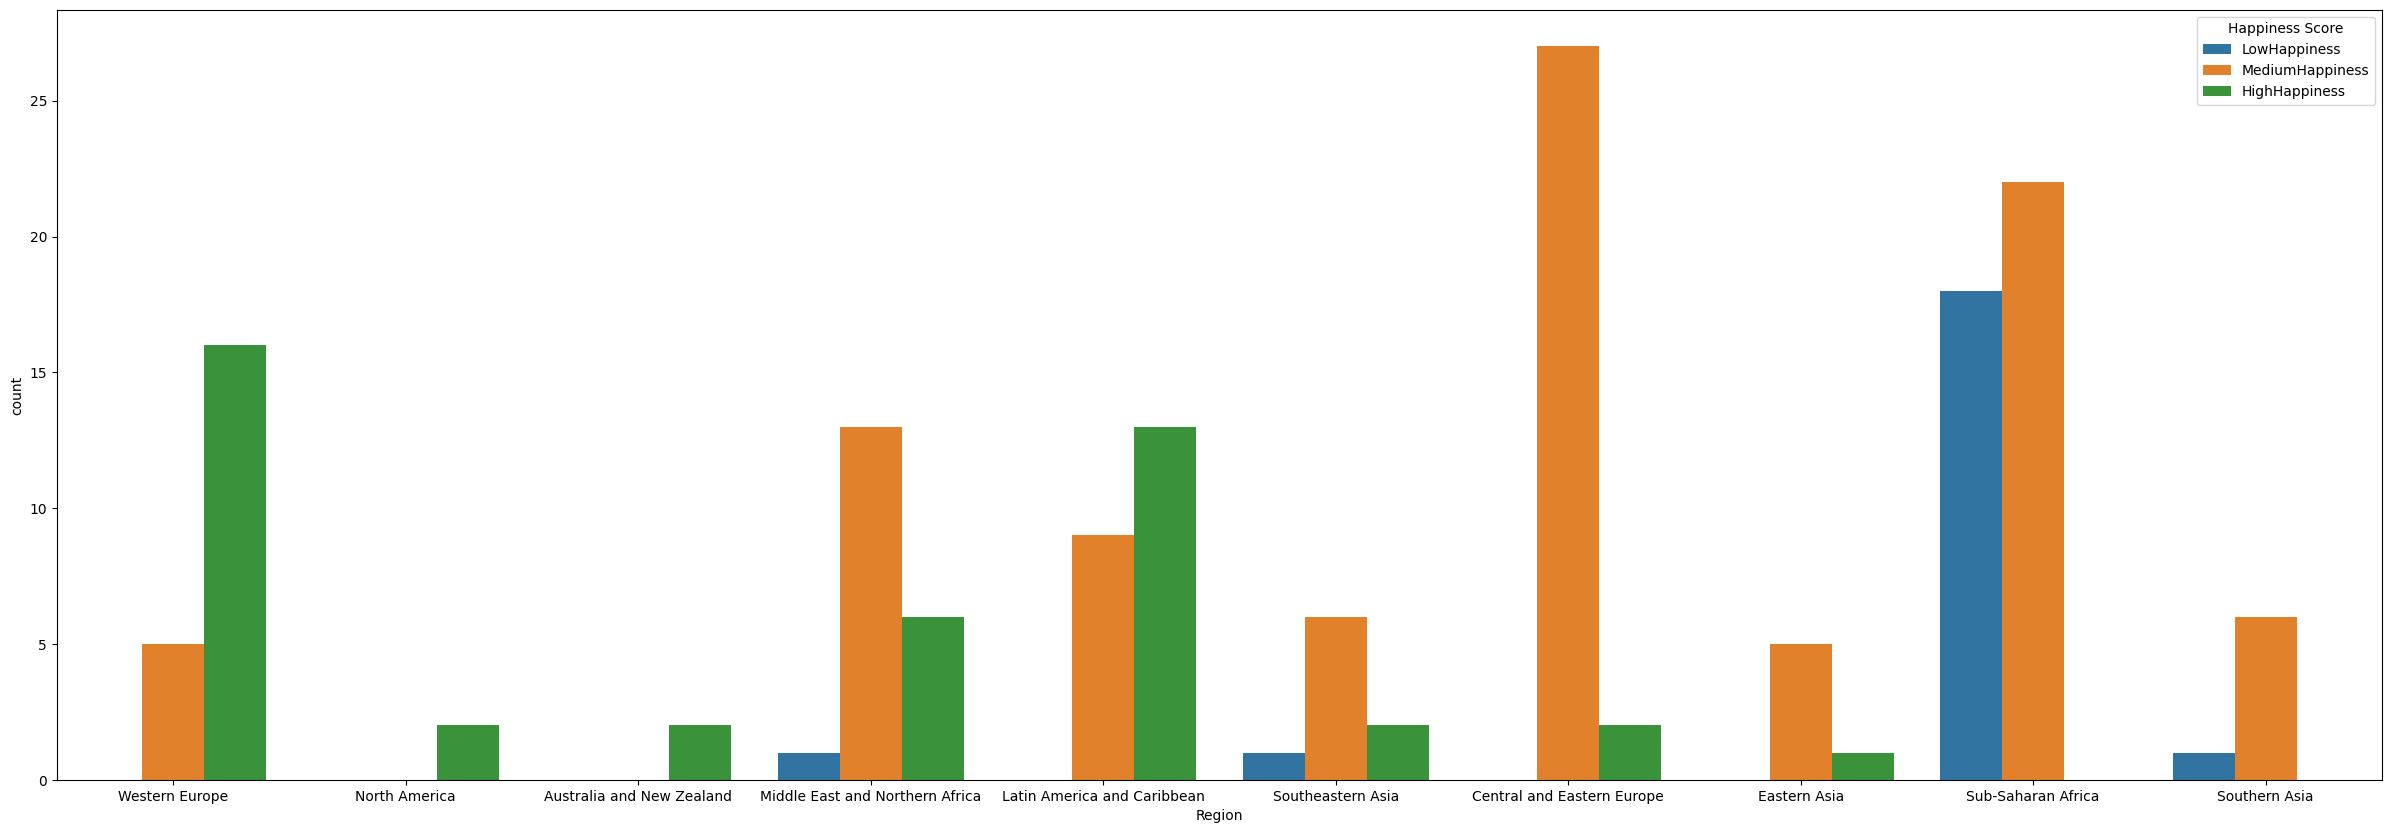

In [ ]:
#Clustered bar chart of happiness score by region
plt.figure(figsize=(30,10))
sns.countplot(x="Region",hue="Happiness Score",data=data)

Text(0.5, 1.0, 'Histogram of the Health(Life Expectancy)')

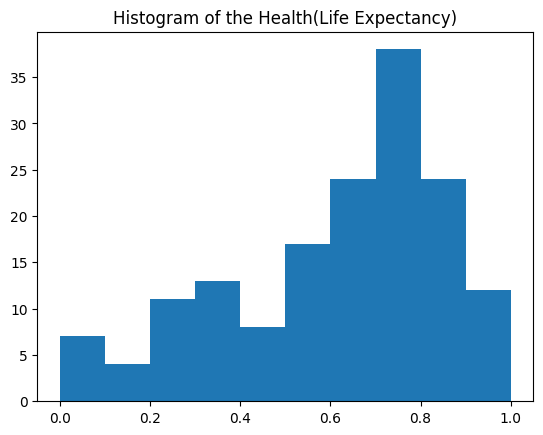

In [ ]:
#Histogram of health
plt.hist(data["Health (Life Expectancy)"])
plt.title("Histogram of the Health(Life Expectancy)")

In [107]:
def bar_chart(feature):
    lowsatisfied = data[data['Happiness Score']=='LowHappiness'][feature].value_counts() #counts the number of feature values of the people's happiness by region
    midsatisfied = data[data['Happiness Score']=='MediumHappiness'][feature].value_counts()
    highsatisfied = data[data['Happiness Score'] == 'HighHappiness'][feature].value_counts()
    df = pd.DataFrame([lowsatisfied,midsatisfied,highsatisfied]) #Converting the three groups into a dataframe
    df.index=['Low Happiness','Medium Happiness', 'High Happiness'] #Labelling the three categories
    df.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

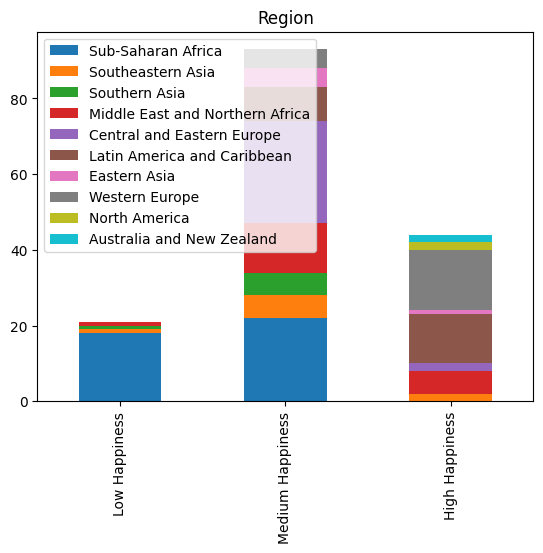

In [108]:
#Stacked bar chart of happiness score by region
bar_chart("Region")